<a href="https://colab.research.google.com/github/inoue0426/scRNA-Data-Simulation-Comparison/blob/main/notebooks/Splatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion'

Old packages: 'crayon', 'fansi', 'knitr', 'processx', 'readxl', 'sass',
  'tinytex', 'tzdb', 'cluster', 'MASS', 'Matrix', 'nlme'



In [ ]:
BiocManager::install("splatter")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'splatter'

also installing the dependencies ‘zlibbioc’, ‘formatR’, ‘bitops’, ‘XVector’, ‘lambda.r’, ‘futile.options’, ‘sparseMatrixStats’, ‘RcppHNSW’, ‘ScaledMatrix’, ‘irlba’, ‘rsvd’, ‘beeswarm’, ‘vipor’, ‘RCurl’, ‘GenomeInfoDbData’, ‘GenomicRanges’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘limma’, ‘scuttle’, ‘gridExtra’, ‘DelayedMatrixStats’, ‘beachmat’, ‘BiocNeighbors’, ‘BiocSingular’, ‘ggbeeswarm’, ‘viridis’, ‘Rtsne’, ‘ggrepel’, ‘MatrixGenerics’, ‘Biobase’, ‘IRanges’, ‘GenomeInfoDb’, ‘SingleCellExperiment’, ‘BiocGenerics’, ‘BiocParallel’, ‘checkmate’, ‘edgeR’, ‘fitdistrplus’, ‘locfit’, ‘matrixStats’, ‘scater’, ‘SummarizedExperiment’, ‘S4Vectors’


Old packages: 'crayon', 'fansi', 'knitr', 'processx', 'readxl', 'sass',
  'tin

In [ ]:
suppressPackageStartupMessages({
  library(splatter)
  library(scater)
})

In [ ]:
set.seed(1)
sce <- mockSCE()

In [ ]:
params <- setParams(params, update = list(nGenes = 1000, batchCells = 1000, group.prob = c(0.5, 0.5)))

In [ ]:
t <- splatSimulate(params)

Getting parameters...

Creating simulation object...

Simulating library sizes...

Simulating gene means...

Simulating BCV...

Simulating counts...

Simulating dropout (if needed)...

Sparsifying assays...

Automatically converting to sparse matrices, threshold = 0.95

Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'BCV': estimated sparse size 1.5 * dense matrix

Skipping 'CellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'TrueCounts': estimated sparse size 2.8 * dense matrix

Skipping 'counts': estimated sparse size 2.8 * dense matrix

Done!



In [ ]:
counts(t)

In [ ]:
sim.groups <- splatSimulate(group.prob = c(0.5, 0.5), method = "groups",
                            verbose = FALSE)

In [ ]:
counts(sim)

In [ ]:
sim.groups.groups

ERROR: ignored

In [ ]:
getParam(params, "nGenes")

[1] 10000

In [ ]:
params <- setParam(params, "nGenes", 5000)
getParam(params, "nGenes")

[1] 5000

In [ ]:
params <- setParams(params, update = list(nGenes = 8000, mean.rate = 0.5))
getParams(params, c("nGenes", "mean.rate", "mean.shape"))

$nGenes
[1] 8000

$mean.rate
[1] 0.5

$mean.shape
[1] 0.6

In [ ]:
params <- setParams(params, mean.shape = 0.5, de.prob = 0.2)
params

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(GENES)  (Cells)   [Seed] 
   8000      100   809204 

29 additional parameters 

Batches: 
    [Batches]  [Batch Cells]     [Location]        [Scale]       [Remove] 
            1            100            0.1            0.1          FALSE 

Mean: 
 (RATE)  (SHAPE) 
    0.5      0.5 

Library size: 
(Location)     (Scale)      (Norm) 
        11         0.2       FALSE 

Exprs outliers: 
(Probability)     (Location)        (Scale) 
         0.05              4            0.5 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[PROBABILITY]    [Down Prob]     [Location]        [Scale] 
          0.2            0.5            0.1            0.4 

BCV: 
(Common Disp)          (DoF) 
          0.1             60 

Dropout: 
    [Type]  (Midpoint)     (Shape) 
      none         

In [ ]:
params <- newSplatParams(lib.loc = 12, lib.scale = 0.6)
getParams(params, c("lib.loc", "lib.scale"))

$lib.loc
[1] 12

$lib.scale
[1] 0.6

In [ ]:
counts <- counts(sce)

class(counts)

typeof(counts)

dim(counts)

counts[1:5, 1:5]

params <- splatEstimate(counts)

[1] "matrix" "array"

[1] "double"

[1] 2000  200

,Cell_001,Cell_002,Cell_003,Cell_004,Cell_005
Gene_0001,0,5,7,276,50
Gene_0002,12,0,0,0,0
Gene_0003,97,292,58,64,541
Gene_0004,0,0,0,170,19
Gene_0005,105,123,174,565,1061


NOTE: Library sizes have been found to be normally distributed instead of log-normal. You may want to check this is correct.



In [ ]:
sim <- splatSimulate(params, nGenes = 1000)

Getting parameters...

Creating simulation object...

Simulating library sizes...

Simulating gene means...

Simulating BCV...

Simulating counts...

Simulating dropout (if needed)...

Sparsifying assays...

Automatically converting to sparse matrices, threshold = 0.95

Skipping 'BatchCellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'BaseCellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'BCV': estimated sparse size 1.5 * dense matrix

Skipping 'CellMeans': estimated sparse size 1.5 * dense matrix

Skipping 'TrueCounts': estimated sparse size 2.79 * dense matrix

Skipping 'counts': estimated sparse size 2.79 * dense matrix

Done!



In [ ]:
sim

class: SingleCellExperiment 
dim: 1000 200 
metadata(1): Params
assays(6): BatchCellMeans BaseCellMeans ... TrueCounts counts
rownames(1000): Gene1 Gene2 ... Gene999 Gene1000
rowData names(4): Gene BaseGeneMean OutlierFactor GeneMean
colnames(200): Cell1 Cell2 ... Cell199 Cell200
colData names(3): Cell Batch ExpLibSize
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [ ]:
counts(sim)[1:5, 1:5]

head(rowData(sim))

,Cell1,Cell2,Cell3,Cell4,Cell5
Gene1,1389,103,260,346,77
Gene2,665,518,338,278,172
Gene3,53,32,131,5,130
Gene4,11,7,9,22,1
Gene5,71,603,536,603,64


DataFrame with 6 rows and 4 columns
             Gene BaseGeneMean OutlierFactor  GeneMean
      <character>    <numeric>     <numeric> <numeric>
Gene1       Gene1    158.39025             1 158.39025
Gene2       Gene2    211.52051             1 211.52051
Gene3       Gene3     42.85098             1  42.85098
Gene4       Gene4      6.02575             1   6.02575
Gene5       Gene5    208.05024             1 208.05024
Gene6       Gene6     48.51602             1  48.51602

In [ ]:
head(colData(sim))

DataFrame with 6 rows and 3 columns
             Cell       Batch ExpLibSize
      <character> <character>  <numeric>
Cell1       Cell1      Batch1     341835
Cell2       Cell2      Batch1     332378
Cell3       Cell3      Batch1     377041
Cell4       Cell4      Batch1     359911
Cell5       Cell5      Batch1     346109
Cell6       Cell6      Batch1     351865

In [ ]:
names(assays(sim))

assays(sim)$CellMeans[1:5, 1:5]

[1] "BatchCellMeans" "BaseCellMeans"  "BCV"            "CellMeans"     
[5] "TrueCounts"     "counts"

,Cell1,Cell2,Cell3,Cell4,Cell5
Gene1,1441.75270,113.641357,246.591752,344.731803,82.3219462
Gene2,685.08679,509.708522,333.256194,264.884555,182.4592456
Gene3,64.03697,28.908207,135.177628,5.362893,119.8717208
Gene4,14.15862,5.122238,7.556582,16.712892,0.8358969
Gene5,78.19663,579.755620,528.201778,565.629388,61.3282437


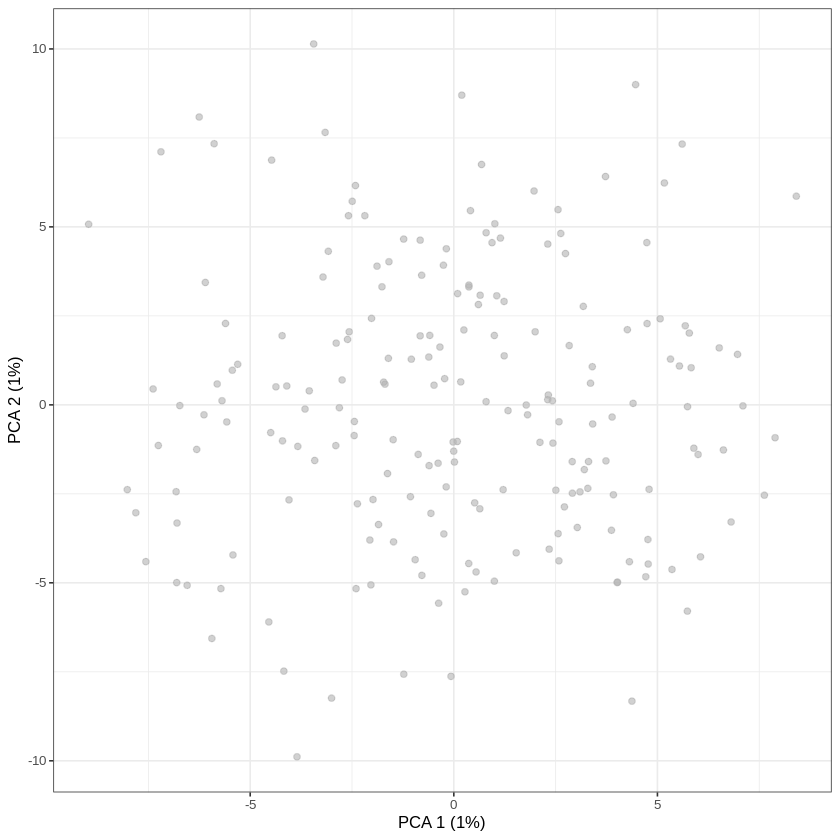

In [ ]:
sim <- logNormCounts(sim)
# Plot PCA
sim <- runPCA(sim)
plotPCA(sim)

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”


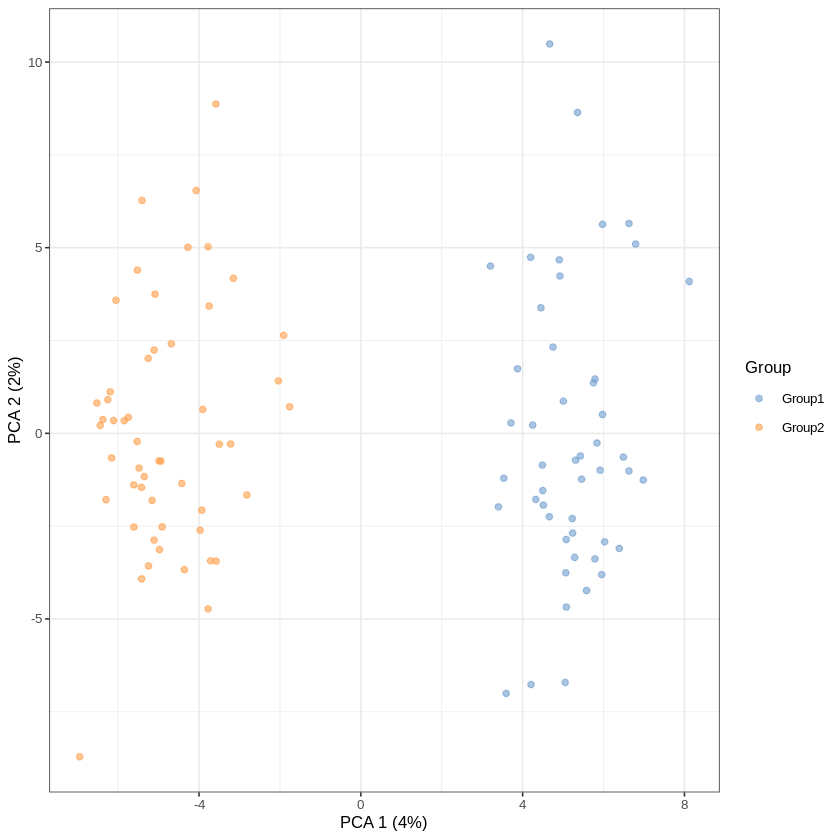

In [ ]:
sim.groups <- splatSimulate(group.prob = c(0.5, 0.5), method = "groups",
                            verbose = FALSE)
sim.groups <- logNormCounts(sim.groups)
sim.groups <- runPCA(sim.groups)
plotPCA(sim.groups, colour_by = "Group")

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”


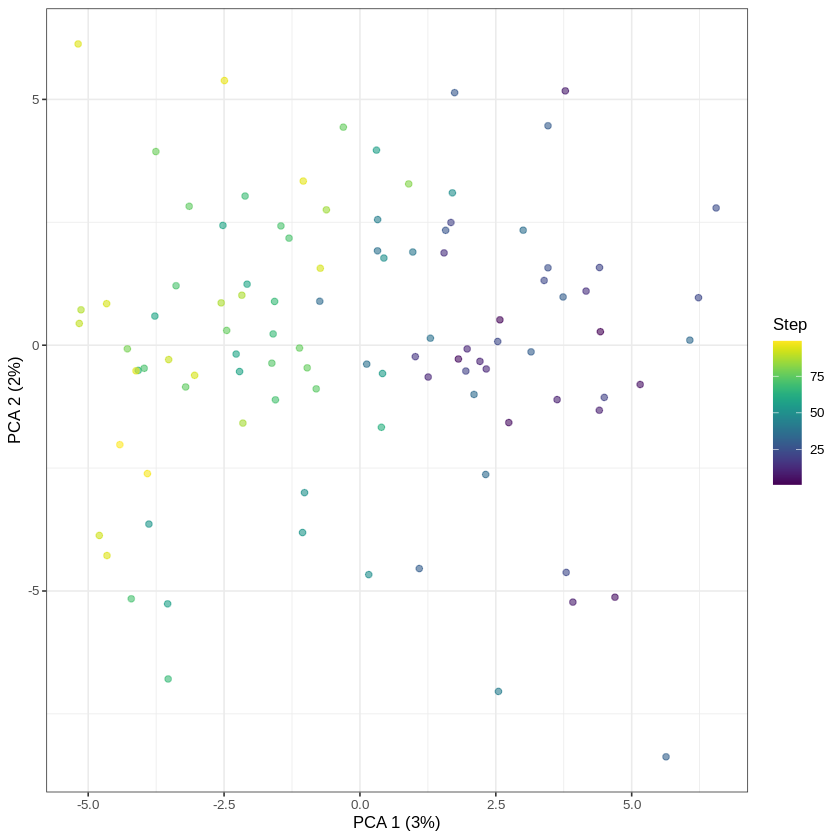

In [ ]:
sim.paths <- splatSimulate(de.prob = 0.2, nGenes = 1000, method = "paths",
                           verbose = FALSE)
sim.paths <- logNormCounts(sim.paths)
sim.paths <- runPCA(sim.paths)
plotPCA(sim.paths, colour_by = "Step")

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”


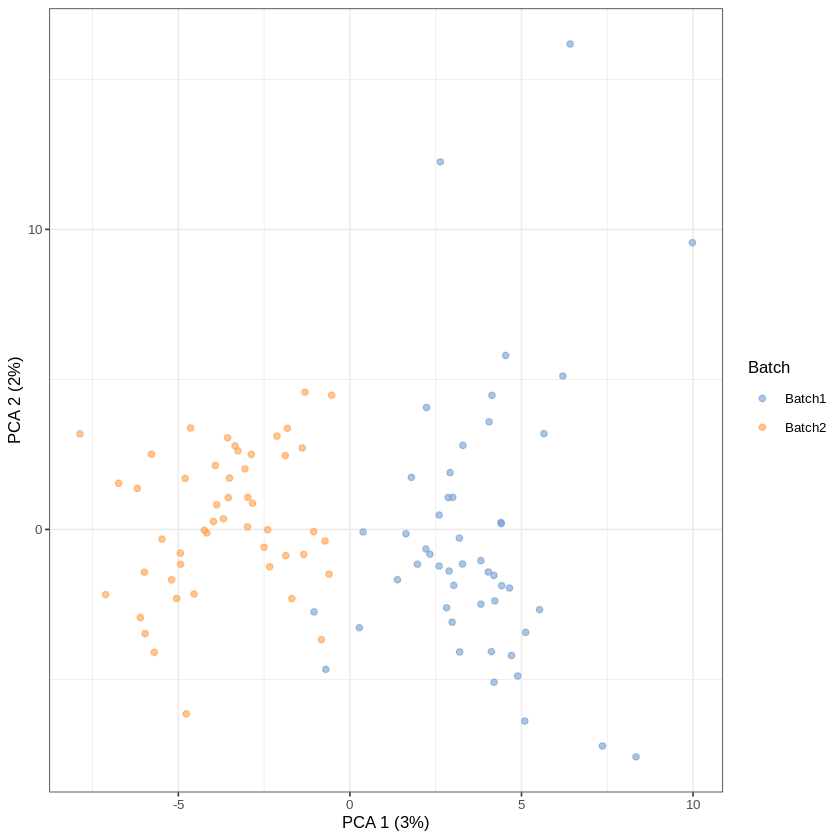

In [ ]:
sim.batches <- splatSimulate(batchCells = c(50, 50), verbose = FALSE)
sim.batches <- logNormCounts(sim.batches)
sim.batches <- runPCA(sim.batches)
plotPCA(sim.batches, colour_by = "Batch")

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”


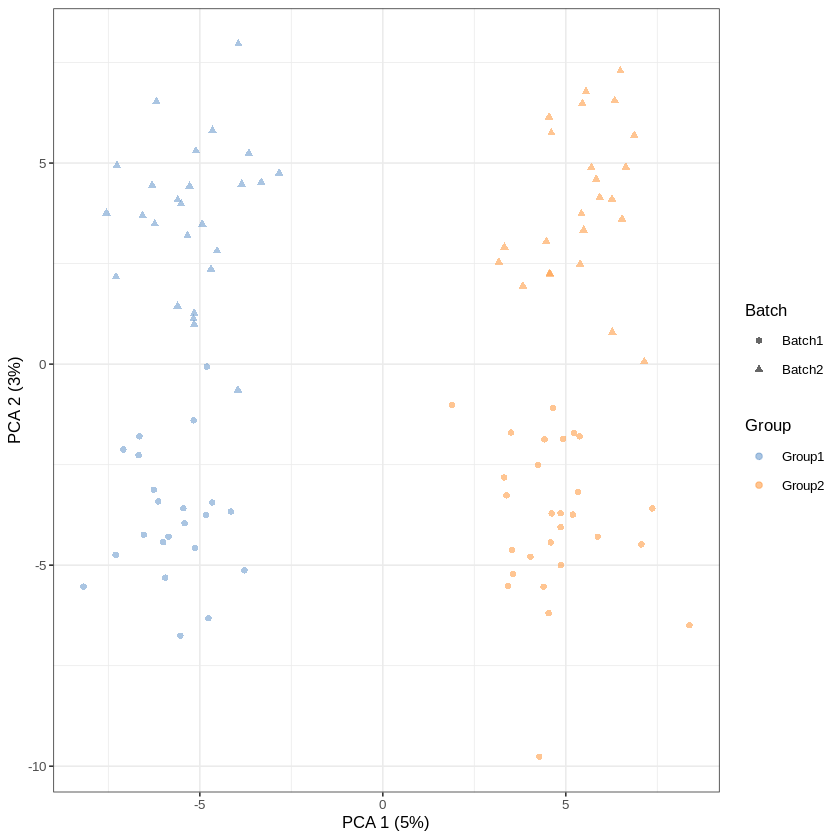

In [ ]:
sim.groups <- splatSimulate(batchCells = c(50, 50), group.prob = c(0.5, 0.5),
                            method = "groups", verbose = FALSE)
sim.groups <- logNormCounts(sim.groups)
sim.groups <- runPCA(sim.groups)
plotPCA(sim.groups, shape_by = "Batch", colour_by = "Group")